# Supplemental Figure 4

## Caption
Total number of service locations within the phosphorous plume (Blue) and the cumulative number of exceedance days at all service locations within the phosphorous plume (Red) calculated separately for each river and in each month A) June B) July, and C) August. 

In [1]:
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.size']=12
rcParams['xtick.labelsize']=12
rcParams['ytick.labelsize']=12
rcParams['axes.labelsize']=12
rcParams['axes.titlesize']=12

import numpy as np
import xarray as xr
import pandas as pd
import cmocean
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
from matplotlib.ticker import AutoMinorLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.lines import Line2D
import os

/Users/gloege/anaconda3/envs/cartopy/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


# Load data

In [2]:
data_clean='/Users/gloege/Documents/Projects/MITgcm-Michigan-Phosphorus/data/clean/'
ds = xr.open_dataset(f'{data_clean}ED_at_ES_all_rivers_JJA.nc')

# Generate Figure

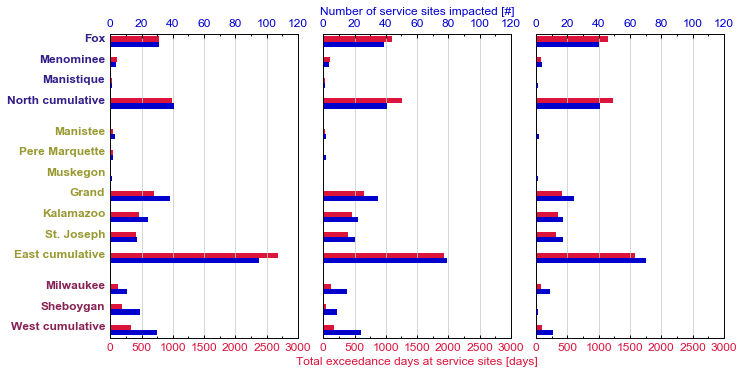

In [19]:
### ==============================================================
### Define the mother grid
### ==============================================================
fig = plt.figure(figsize=(11, 8.5))
grid = AxesGrid(fig, 111, 
                share_all=False,
                nrows_ncols = (1, 3),
                axes_pad = 0.35,
                label_mode = 'L')  

### ==============================================================
### second x axis with a twin y axis
### ==============================================================
ax2 = [grid[0].axes.twiny(), grid[1].axes.twiny(), grid[2].axes.twiny()]

### ==============================================================
### Names of rivers for plotting
### ==============================================================
rivers = ['Fox','Menominee','Manistique', 'north',
          'Manistee','Pere_Marquette','Muskegon','Grand' ,'Kalamazoo', 'St_Joseph', 'east',
           'Milwaukee','Sheboygan','west' ] 

### ==============================================================
### River and month labels
### ==============================================================
rivers_labels = ['Fox','Menominee','Manistique', 'North cumulative',
                 'Manistee','Pere Marquette','Muskegon','Grand' ,'Kalamazoo', 'St. Joseph', 'East cumulative',
                'Milwaukee','Sheboygan','West cumulative' ] 

monthLabel = ['June', 'July', 'August']

### ==============================================================
### position of label on y axis
### ==============================================================
pos = [0, 1, 2, 3, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 12, 13, 14]

### ==============================================================
### width of each bar
### ==============================================================
width = 0.25  

### ==============================================================
### Define label colors
### ==============================================================
N = list(map(lambda x: x/255, [51, 31, 136]))
SE = list(map(lambda x: x/255, [153, 153, 51]))
SW = list(map(lambda x: x/255, [136, 34, 85]))

# Plot the points 
for month_num, month in enumerate(['june', 'july', 'august']):
    for riv_num, riv in zip(pos, rivers):
        
        ### ==============================================================
        ### Define number sites and total exceedance days
        ### ==============================================================
        num_sites = (ds[riv].where(ds['months']==month, drop=True).squeeze()>0).sum()
        ed_total = ds[riv].where(ds['months']==month, drop=True).squeeze().sum()
        
        ### ==============================================================
        ### Plot total exceedance days on Grid
        ### ==============================================================
        xval = riv_num-(width/2)
        grid[month_num].barh(xval, ed_total, width,
           edgecolor=None,
           align='center', 
           color=[220/255,20/255,60/255], 
           label='ed')

        ### ==============================================================
        ### Plot num sites on ax2
        ### ==============================================================
        xval = riv_num+width-(width/2)
        ax2[month_num].barh(xval, num_sites, width,
               edgecolor=None,
               align='center', 
               color=[0/255,0/255,205/255], 
               label='sites')
        
    ### ==============================================================
    ### Exceedance days x axis
    ### ==============================================================
    grid[month_num].xaxis.label.set_color([220/255,20/255,60/255])
    grid[month_num].tick_params(axis='x', colors=[220/255,20/255,60/255])

    if month_num==1:
        grid[month_num].set_xlabel('Total exceedance days at service sites [days]', 
                               fontsize=12)
        
    grid[month_num].set_xlim(0, 3000)
    grid[month_num].set_xticks(np.arange(0, 3500, 500))
    grid[month_num].xaxis.set_minor_locator(AutoMinorLocator(2))
    grid[month_num].tick_params(axis='x', 
                                which='both', 
                                direction='in', 
                                width=1, 
                                color='k', 
                                pad=5, 
                                labelsize=12)

    ### ==============================================================
    ### Exceedance days y axis
    ### ==============================================================
    grid[month_num].set_yticks(pos)
    grid[month_num].set_yticklabels(rivers_labels, 
                                    fontsize=12, 
                                    fontweight='bold',
                                    verticalalignment='baseline')
    grid[month_num].tick_params(axis='y', 
                                which='both', 
                                direction='in', 
                                width=0, 
                                color='k', 
                                pad=5, 
                                labelsize=12)

    ### ==============================================================
    ### Number of sites x axis
    ### ==============================================================
    ax2[month_num].xaxis.label.set_color([0/255,0/255,205/255])
    ax2[month_num].tick_params(axis='x', colors=[0/255,0/255,205/255])
    ax2[month_num].xaxis.tick_top()
    ax2[month_num].xaxis.set_label_position("top")
    
    if month_num==1:
        ax2[month_num].set_xlabel('Number of service sites impacted [#]', 
                              fontsize=12)
        
    ax2[month_num].set_xlim(0, 120)
    ax2[month_num].set_xticks(np.arange(0, 130, 20))
    ax2[month_num].xaxis.set_minor_locator(AutoMinorLocator(2))
    ax2[month_num].tick_params(axis='x', 
                               which='both', 
                               direction='in', 
                               width=1, 
                               color='k', 
                               pad=5, 
                               labelsize=12)   
 
    ### ==============================================================
    ### Color of labels
    ### ==============================================================
    [t.set_color(i) for (i,t) in
         zip([N, N, N, N, SE, SE, SE, SE, SE, SE, SE, SW, SW, SW],
             grid[month_num].yaxis.get_ticklabels())]
        
    ### ==============================================================
    ### Set y-limit and add Grid Lines
    ### ==============================================================
    grid[month_num].set_ylim(-(width+width/2), 14+width+width/2)
    grid[month_num].grid(axis='x', b=True, which='major', color=[0.8, 0.8, 0.8], linestyle='-')
    
    ### ==============================================================
    ### Flip so bars correspond to labels
    ### ==============================================================
    grid[month_num].invert_yaxis() 
    
### ==============================================================
### Make axes golden rectangles
### ==============================================================
for ax in grid:    
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
    ax.set_aspect(abs(x1-x0)/abs(y1-y0)*1.618)
    ax.get_position().bounds
